#### **Ejercicio:** Ejercicios de Potenciación del gradiente

**Elaborado por:** Fabian Villarreal Sosa

Kaggle es un sitio de concursos sobre ciencia de datos.  La Potenciación del gradiente ha ganado muchas competencias Kaggle usando datos tabulados. Tu tarea es completar un concurso Kaggle.

Primero, necesitas crear una cuenta en Kaggle si aún no lo haces.

Usa la técnica de Potenciación del gradiente para competir en un [concurso Kaggle](https://www.kaggle.com/competitions) de tu preferencia. Puedes competir en un concurso activo o en uno terminado. Aunque un concurso esté completo, puedes hacer una entrega tardía para ver cómo se desempeña tu modelo en comparación al de otros. Esto requerirá que descargues los datos, los limpies, y construyas un modelo usando los datos de entrenamiento que te da Kaggle. Luego, crearás predicciones para probar los datos que Kaggle te proporciona y entregarás tus predicciones para entrar en la competencia.

Entrega tus resultados y presenta un pantallazo de tu posición en el marcador de la competencia Kaggle que elegiste para entregar esta tarea.

**Spaceship Titanic**

Predict which passengers are transported to an alternate dimension

**Datos:** https://www.kaggle.com/c/spaceship-titanic/overview

In [313]:
# Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from google.colab import drive

In [288]:
# Acceder a directorio en Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [289]:
# Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/3_Advanced Machine Learning/Week10_Gradient Boosting/Deberes')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/3_Advanced Machine Learning/Week10_Gradient Boosting/Deberes'

**Train dataset**

In [290]:
# Datos
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [291]:
# Informacion de los datos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [292]:
# Estadistica descriptiva
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [293]:
# Estadistica descriptiva por categoria VIP
print('VIP == False')
print(df_train[df_train['VIP'] == False].describe().loc[['mean', '50%']])
print('VIP == True')
print(df_train[df_train['VIP'] == True].describe().loc[['mean', '50%']])

VIP == False
            Age  RoomService   FoodCourt  ShoppingMall         Spa      VRDeck
mean  28.639611   217.218527  426.336536    173.876298  301.711045  282.718056
50%   27.000000     0.000000    0.000000      0.000000    0.000000    0.000000
VIP == True
            Age  RoomService    FoodCourt  ShoppingMall        Spa      VRDeck
mean  37.449495   473.615385  1811.393782    247.726804  760.71066  1234.85641
50%   34.000000     0.000000   287.000000      0.000000   39.00000    30.00000


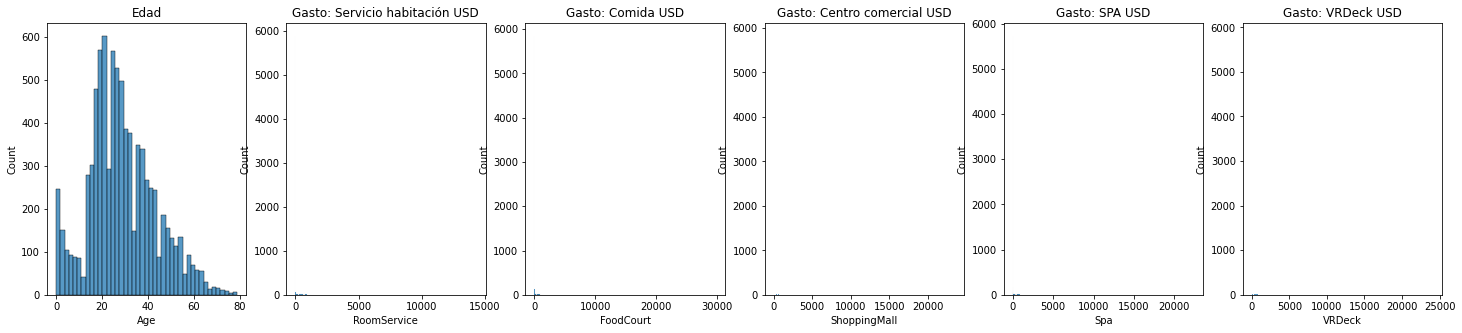

In [294]:
# Distribucion de variables
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (25, 5), sharex = False, sharey = False)

sns.histplot(df_train['Age'], ax=axes[0])
axes[0].set_title('Edad')

sns.histplot(df_train['RoomService'], ax=axes[1])
axes[1].set_title('Gasto: Servicio habitación USD')

sns.histplot(df_train['FoodCourt'], ax=axes[2])
axes[2].set_title('Gasto: Comida USD')

sns.histplot(df_train['ShoppingMall'], ax=axes[3])
axes[3].set_title('Gasto: Centro comercial USD');

sns.histplot(df_train['Spa'], ax=axes[4])
axes[4].set_title('Gasto: SPA USD');

sns.histplot(df_train['VRDeck'], ax=axes[5])
axes[5].set_title('Gasto: VRDeck USD');

In [295]:
# Valores perdidos
col_nans = df_train.columns[df_train.isna().any()]
col_nans

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')

In [296]:
df_train[col_nans].isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [297]:
print(round(df_train[col_nans].isna().sum() / len(df_train) * 100, 2))

HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
dtype: float64


Imputación de datos

In [298]:
# Obtener variable del grupo de viaje de cada pasajero
df_train['Group'] = df_train['PassengerId'].str[:4]
df_test['Group'] = df_test['PassengerId'].str[:4]

In [299]:
col_nans

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')

In [300]:
# Columnas para las cuales se imputaran valores
cols1 = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
cols2 = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [301]:
# Para las variables categoricas, se asume una imputacion de acuerdo a la moda de cada columna
for col in cols1:
  df_train[col].fillna(df_train[col].mode()[0], inplace = True)
  df_test[col].fillna(df_test[col].mode()[0], inplace = True)

In [302]:
# Para las variables continuas se asume una imputacion de acuerdo a la categoria VIP
for col in cols2:
  df_train[col] = df_train.groupby(['VIP'])[col].transform(lambda x: x.fillna(x.mean()))
  df_test[col] = df_test.groupby(['VIP'])[col].transform(lambda x: x.fillna(x.mean()))  

In [303]:
# Obtener el deck
df_train['Deck'] = df_train['Cabin'].str[:1]
df_test['Deck'] = df_test['Cabin'].str[:1]

In [304]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F


Tratamiento de variables

In [305]:
# Dummies
df_train['CryoSleep'] = df_train['CryoSleep'].map({False: 0, True: 1})
df_train['VIP'] = df_train['VIP'].map({False: 0, True: 1})
df_train['Transported'] = df_train['Transported'].map({False: 0, True: 1})

df_test['CryoSleep'] = df_test['CryoSleep'].map({False: 0, True: 1})
df_test['VIP'] = df_test['VIP'].map({False: 0, True: 1})

In [306]:
# Variables explicativas y dependiente
X_var = df_train.drop(['PassengerId', 'Name', 'Cabin', 'Group', 'Transported'], axis = 1). columns
X_train = df_train.loc[:, X_var]
X_test = df_test.loc[:, X_var]

y_train = df_train.loc[:, 'Transported'].values

print('Dimensiones X (Train):', X_train.shape)
print('Dimensiones y (Train):', y_train.shape)

print('Dimensiones X (Test):', X_test.shape)

Dimensiones X (Train): (8693, 11)
Dimensiones y (Train): (8693,)
Dimensiones X (Test): (4277, 11)


In [307]:
# Dummies
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

Estimación del modelo

In [308]:
# Estimacion del modelo
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

Exportar resultados

In [309]:
df_res = df_test[['PassengerId']].copy()

In [310]:
df_res['Transported'] = xgb.predict(X_test)

In [311]:
df_res

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [312]:
df_res.to_csv('resultados1.csv', index = False)

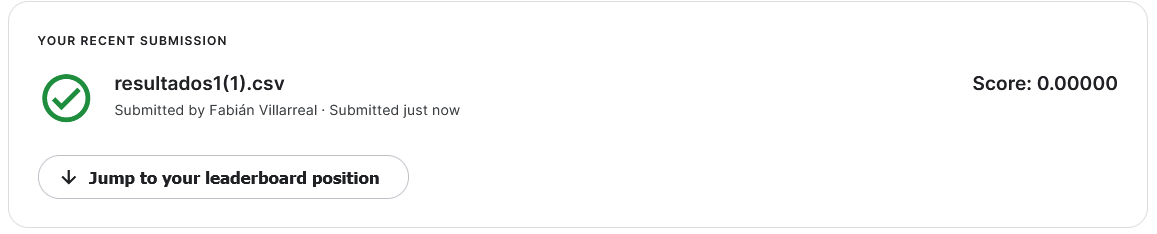